## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [89]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%pylab inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


/Users/Indi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


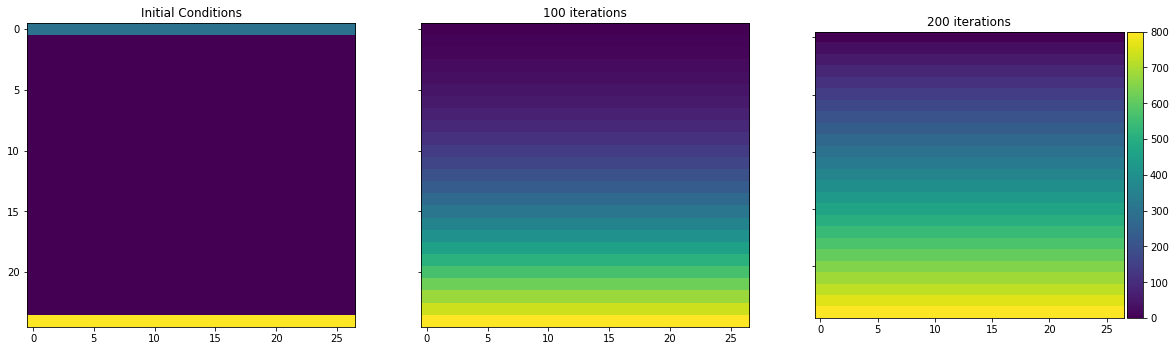

In [162]:
I = np.zeros((ny,nx))

# Initial conditions
I[0,:] = 300.
I[-1,:] = 800.

T = np.zeros((ny,nx))
time = 0.0

# FOR LOOP STARTS HERE
for i in range (0,100):
    # Initial conditions
    T[0,:] = 300.
    T[-1,:] = 800.

    k = 1.0


    # 1 timestep

    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    time += dt

    T = T + dt*divT
    
P = np.zeros((ny,nx))
time = 0.0

# FOR LOOP STARTS HERE
for i in range (0,200):
    # Initial conditions
    P[0,:] = 300.
    P[-1,:] = 800.

    k = 1.0


    # 1 timestep

    gradPx, gradPy = np.gradient(P, dx, dy)
    flux_x = k*gradPx
    flux_y = k*gradPy

    gradPxx, gradPxy = np.gradient(flux_x, dx, dy)
    gradPyx, gradPyy = np.gradient(flux_y, dx, dy)

    divP = gradPxx + gradPyy
    dt = (dx*dy)/k
    time += dt

    P = P + dt*divP

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(20,8))


mappable= ax1.imshow(I)
ax1.set_title("Initial Conditions")

ax2.imshow(T)
ax2.set_title("100 iterations")

ax3.imshow(P)
ax3.set_title("200 iterations")
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05, label="Degrees C")
plt.colorbar(mappable, cax=cax)


We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

Text(0.5, 1.0, 'dt =200000')

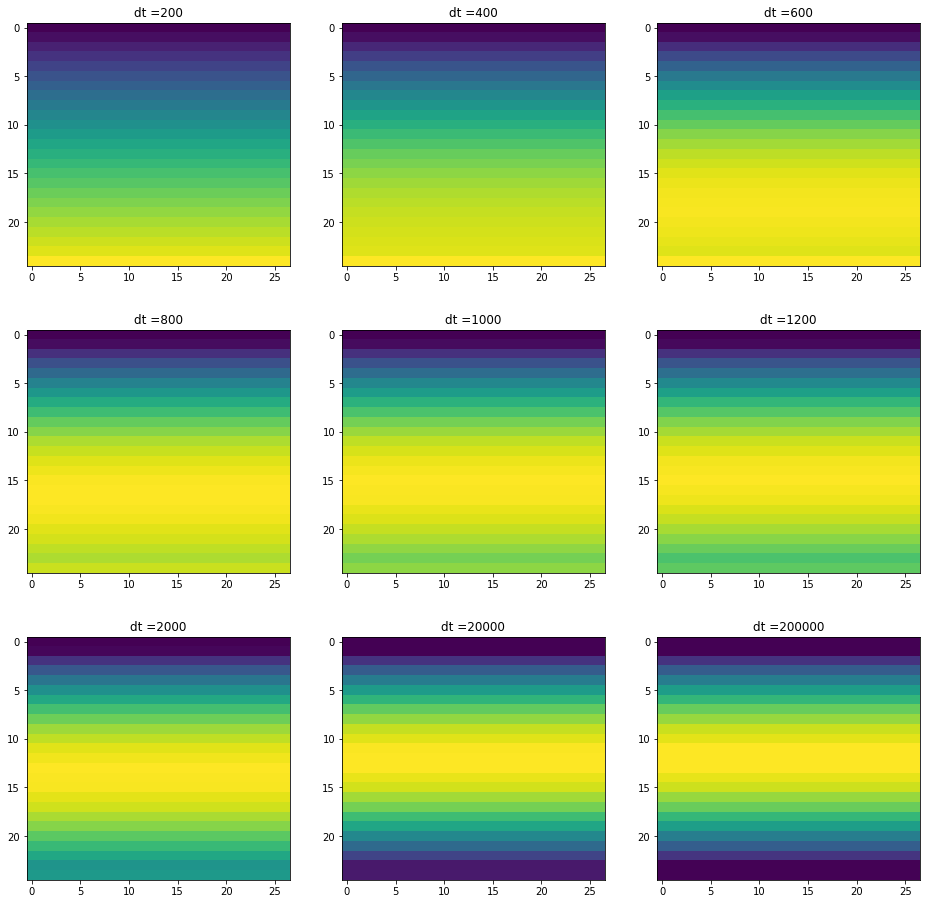

In [177]:
T = np.zeros((ny,nx))
# Initial conditions
for i in range (0,200):
    T[0,:] = 300.
    T[-1,:] = 800.

    k = 1.0

    # 1 timestep
    time = 0.0
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt =(dx*dy)/k
    dt1 = 200
    dt2 = 400
    dt3 = 600
    dt4 = 800
    dt5 = 1000
    dt6 = 1200
    dt7 = 2000
    dt8 = 20000
    dt9 = 200000
    time += dt

    T = T + dt*divT
    T_dt1 = T + dt1*divT
    T_dt2 = T + dt2*divT
    T_dt3 = T + dt3*divT
    T_dt4 = T + dt4*divT
    T_dt5 = T + dt5*divT
    T_dt6 = T + dt6*divT
    T_dt7 = T + dt7*divT
    T_dt8 = T + dt8*divT
    T_dt9 = T + dt9*divT
    
fig, axes = plt.subplots(ncols=3, nrows=3)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.ravel()
fig.set_size_inches((16,16))

#fig, (ax1, ax2, ax3) = plt.subplots(1,2, 3 sharey=True, figsize=(10,4))
ax1.imshow(T_dt1)
ax2.imshow(T_dt2)
ax3.imshow(T_dt3)
ax4.imshow(T_dt4)
ax5.imshow(T_dt5)
ax6.imshow(T_dt6)
ax7.imshow(T_dt7)
ax8.imshow(T_dt8)
ax9.imshow(T_dt9)

ax1.set_title("dt =200")
ax2.set_title("dt =400")
ax3.set_title("dt =600")
ax4.set_title("dt =800")
ax5.set_title("dt =1000")
ax6.set_title("dt =1200")
ax7.set_title("dt =2000")
ax8.set_title("dt =20000")
ax9.set_title("dt =200000")
